# QuTiP lecture: simulation of a two-qubit gate using a resonator as coupler

Author: J.R. Johansson, robert@riken.jp

http://dml.riken.jp/~rob/

Latest version of this ipython notebook lecture are available at: http://github.com/jrjohansson/qutip-lectures

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from qutip import *

## Parameters

In [3]:
N = 10
pi =  np.pi
wc = 5.0 * 2 * pi
w1 = 3.0 * 2 * pi
w2 = 2.0 * 2 * pi

g1 = 0.01 * 2 * pi
g2 = 0.0125 * 2 * pi
print(g1)
print(g2)

tlist = np.linspace(0, 100, 500)

width = 0.5

# resonant SQRT iSWAP gate
T0_1 = 20
T_gate_1 = (1*pi)/(4 * g1)

# resonant iSWAP gate
T0_2 = 60
T_gate_2 = (2*pi)/(4 * g2)

0.06283185307179587
0.07853981633974483


### Operators, Hamiltonian and initial state 

dipole operator for the atom has the form

-6.43777131e-01 atomic units, the excited state has a dipole moment of 4.20099337e-01 atomic units, and the transition dipole moment is -7.60294804e-01 (all along z) as computed at the FCI/cc-pVTZ level of theory.

Next block will build the $\lambda \cdot \mu$ matrices for each system (consistent with their g values) for the model that includes 
the full bilinear coupling and dipole self energy

In [4]:
# lamda value s.t. the original mu_12 * lam = g1 -> 0.026919208248238624
lam = 0.026919208248238624 

# scaling of dipole moment for system 2 s.t. original g2 is scaled appropriately -> 1.2247448713915894
tdm_fac = 1.2247448713915894

In [5]:

mu_1 = -6.43777131e-01 * sigmap() * sigmam()
mu_1 += 4.20099337e-01 * sigmam() * sigmap()
mu_1 += -7.60294804e-01 * (sigmap() + sigmam())


d_1 = lam * mu_1
d_2 = tdm_fac * d_1

# define g1 and g2 in terms of sqrt(w/2) * d[0,1] terms
_g1 = np.abs(np.sqrt(w1/2) * d_1[0,1])
_g2 = np.abs(np.sqrt(w2/2) * d_2[0,1])

# resonant SQRT iSWAP gate
T0_1 = 20
T_gate_1 = (1*pi)/(4 * _g1)

# resonant iSWAP gate
T0_2 = 60
T_gate_2 = (2*pi)/(4 * _g2)



In [6]:
d_1

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-0.01732997 -0.02046653]
 [-0.02046653  0.01130874]]

In [7]:
d_2

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-0.02122479 -0.02506628]
 [-0.02506628  0.01385032]]

In [8]:
# cavity operators
a = tensor(destroy(N), qeye(2), qeye(2))
n = a.dag() * a

# operators for qubit 1
sm1 = tensor(qeye(N), destroy(2), qeye(2))
sz1 = tensor(qeye(N), sigmaz(), qeye(2))
n1 = sm1.dag() * sm1

# oeprators for qubit 2
sm2 = tensor(qeye(N), qeye(2), destroy(2))
sz2 = tensor(qeye(N), qeye(2), sigmaz())
n2 = sm2.dag() * sm2

# dipole self energy for qubit 1 and 2
_d1 = tensor(d_1, qeye(2))
_d2 = tensor(qeye(2), d_2)
d1 = tensor(qeye(N), _d1)
d2 = tensor(qeye(N), _d2)

_dse = 1/2 * (_d1 + _d2) @ (_d1 + _d2)
dse = tensor(qeye(N), _dse)

_dse

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.00126683  0.00052682  0.00049601  0.00051302]
 [ 0.00052682  0.00052965  0.00051302 -0.00022185]
 [ 0.00049601  0.00051302  0.00057276 -0.00019104]
 [ 0.00051302 -0.00022185 -0.00019104  0.00084009]]

In [9]:
dse_1 = tensor(qeye(N), (1/2 * _d1 @ _d1))
dse_2 = tensor(qeye(N), (1/2 * _d2 @ _d2))
dse_12 = tensor(qeye(N), (1/2 * _d1 @ _d2 + 1/2 * _d2 @ _d1))


Some more information about the time-dependent syntax from an exchange with Claude:

Question Prompt:  

I am working through a tutorial that implements a sqrt(iswap) gate for two qubits coupled to a cavity mode.  

Here are some of the details of the system:

# number of cavity Fock states
N = 10

# frequency of the cavity, qubit 1, qubit 2 at t=0
wc = 5.0 *  * 2   pi
w1 = 3.0 *  * 2   pi
w2 = 2.0 * * 2  ** pi

# coupling strength between qubit 1 and the cavity (g1) and qubit 2 and the cavity (g2)
g1 = 0.01 *  2 ** pi 
g2 = 0.0125 * 2  * * pi

# times for resonant SQRT iSWAP gate 
T0_1 = 20 
T_gate_1 = (1*pi)/(4 * *g1) *

*# resonant iSWAP gate *
*T0_2 = 60 *
*T_gate_2 = (2**pi)/(4 * g2)

# Building the Hamiltonian for the system at t=0
# cavity operators 
a = tensor(destroy(N), qeye(2), qeye(2))
n = a.dag() * a

# operators for qubit 1
sm1 = tensor(qeye(N), destroy(2), qeye(2))
sz1 = tensor(qeye(N), sigmaz(), qeye(2))
n1 = sm1.dag() * sm1

# operators for qubit 2
sm2 = tensor(qeye(N), qeye(2), destroy(2))
sz2 = tensor(qeye(N), qeye(2), sigmaz())
n2 = sm2.dag() * sm2

# Hamiltonian using QuTiP
Hc = a.dag() * a
H1 = - 0.5 * sz1
H2 = - 0.5 * sz2
Hc1 = g1 * (a.dag() * sm1 + a * sm1.dag())
Hc2 = g2 * (a.dag() * sm2 + a * sm2.dag())

H = wc * * Hc + w1  **H1 + w2 * H2 + Hc1 + Hc2

I feel good about the syntax up to this point, but the next section is where I am getting confused.

First,  a general step function in time that is defined for two different frequencies and some time value.  Here is the function definition:

def step_t(w1, w2, t0, width, t):
    """
    Step function that goes from w1 to w2 at time t0
    as a function of t. 
    """
    return w1 + (w2 - w1) * (t > t0)

Then, I believe this is used to define three specific step functions are defined for the cavity, qubit 1, and qubit 2:

def wc_t(t, args=None):
    return wc

def w1_t(t, args=None):
    return w1 + step_t(0.0, wc-w1, T0_1, width, t) - step_t(0.0, wc-w1, T0_1+T_gate_1, width, t)

def w2_t(t, args=None):
    return w2 + step_t(0.0, wc-w2, T0_2, width, t) - step_t(0.0, wc-w2, T0_2+T_gate_2, width, t)

Then finally, these step functions are used to define a time-dependent Hamiltonian as follows:

H_t = [[Hc, wc_t], [H1, w1_t], [H2, w2_t], Hc1+Hc2]

This last line is very confusing to me.  It appears to have commutators, e.g. [Hc, wc_t], but how are those interpreted by QuTip?  I have not been introduced to that QuTip syntax yet.  Also, how are wc_t, w1_t, and w2_t functioning?  Hc is an operator (or a matrix representation of one), but what kind of object is wc_t?

Answer from Claude:
Great questions! This is a really important part of QuTiP that can be confusing at first. Let me break down what's happening here.
Time-Dependent Hamiltonians in QuTiP
The syntax H_t = [[Hc, wc_t], [H1, w1_t], [H2, w2_t], Hc1+Hc2] is not using commutators. Those square brackets have a completely different meaning in QuTiP's time-dependent Hamiltonian format.
In QuTiP, when you have a time-dependent Hamiltonian, you specify it as a list where each element can be either:

A static operator (like Hc1+Hc2)
A list [operator, coefficient_function] where the operator gets multiplied by the time-dependent coefficient

So your Hamiltonian is actually:
H(t) = wc_t(t) * Hc + w1_t(t) * H1 + w2_t(t) * H2 + (Hc1 + Hc2)
What are wc_t, w1_t, w2_t?
These are Python functions that return scalar values (frequencies) as a function of time. QuTiP will call these functions during the time evolution to get the current coefficient values.

wc_t(t) always returns the constant wc (cavity frequency doesn't change)
w1_t(t) and w2_t(t) return time-dependent frequencies that change in steps

The Step Functions Logic
Let's trace through w1_t(t):
pythondef w1_t(t, args=None):
    return w1 + step_t(0.0, wc-w1, T0_1, width, t) - step_t(0.0, wc-w1, T0_1+T_gate_1, width, t)

At t < T0_1: both step functions return 0, so w1_t(t) = w1 (original frequency)
At T0_1 < t < T0_1+T_gate_1: first step is (wc-w1), second is 0, so w1_t(t) = w1 + (wc-w1) = wc (resonant with cavity)
At t > T0_1+T_gate_1: both steps are (wc-w1), so w1_t(t) = w1 + (wc-w1) - (wc-w1) = w1 (back to original)

This creates a frequency pulse that brings qubit 1 into resonance with the cavity for the gate duration, then returns it to its original frequency.
Does this clarify the time-dependent Hamiltonian syntax and what those functions are doing?RetryClaude does not have the ability to run the code it generates yet.Claude can make mistakes. Please double-check responses. Sonnet 4

In [10]:
# Hamiltonian using QuTiP
coupling="notsimple"

Hc = a.dag() * a
H1 = - 0.5 * sz1
H2 = - 0.5 * sz2

if coupling=="simple":
    Hc1 = _g1 * (a.dag() * sm1 + a * sm1.dag())
    Hc2 = _g2 * (a.dag() * sm2 + a * sm2.dag())
    H = wc * Hc + w1 * H1 + w2 * H2 + Hc1 + Hc2

else:
    Hc1 = np.sqrt(w1/2) * (a.dag() @ d1 + a @ d1)
    Hc2 = np.sqrt(w2/2) * (a.dag() @ d2 + a @ d2)
    H = wc * Hc + w1 * H1 + w2 * H2 + Hc1 + Hc2 + dse

In [11]:
H

Quantum object: dims=[[10, 2, 2], [10, 2, 2]], shape=(40, 40), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-1.57066964e+01  5.26823213e-04  4.96014790e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.26823213e-04 -3.14106300e+00  5.13019932e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 4.96014790e-04  5.13019932e-04  3.14216542e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  2.79602276e+02
   5.13019932e-04 -2.21851267e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.13019932e-04
   2.85885504e+02 -1.91042844e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.21851267e-04
  -1.91042844e-04  2.98452142e+02]]

In [12]:
# initial state: start with one of the qubits in its excited state
psi0 = tensor(basis(N,0),basis(2,1),basis(2,0))


# Ideal two-qubit iSWAP gate

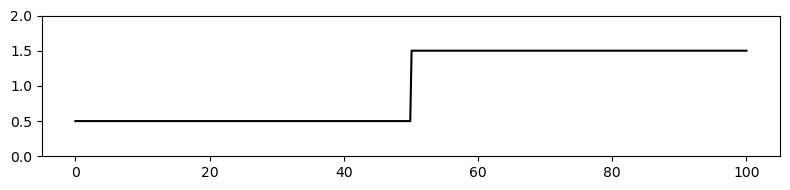

In [13]:
def step_t(w1, w2, t0, width, t):
    """
    Step function that goes from w1 to w2 at time t0
    as a function of t. 
    """
    return w1 + (w2 - w1) * (t > t0)


fig, axes = plt.subplots(1, 1, figsize=(8,2))
axes.plot(tlist, [step_t(0.5, 1.5, 50, 0.0, t) for t in tlist], 'k')
axes.set_ylim(0, 2)
fig.tight_layout()

In [14]:
def wc_t(t, args=None):
    return wc

def w1_t(t, args=None):
    return w1 + step_t(0.0, wc-w1, T0_1, width, t) - step_t(0.0, wc-w1, T0_1+T_gate_1, width, t)

def w2_t(t, args=None):
    return w2 + step_t(0.0, wc-w2, T0_2, width, t) - step_t(0.0, wc-w2, T0_2+T_gate_2, width, t)


H_t_orig =  [[Hc, wc_t], [H1, w1_t], [H2, w2_t], Hc1+Hc2]
H_t_new =   [[Hc, wc_t], [H1, w1_t], [H2, w2_t], H1+H2+Hc+Hc1+Hc2+dse]

### Evolve the system

In [15]:
res = mesolve(H_t_orig, psi0, tlist, [], [])

/Users/jfoley19/miniconda3/envs/qtip/lib/python3.11/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


### Plot the results

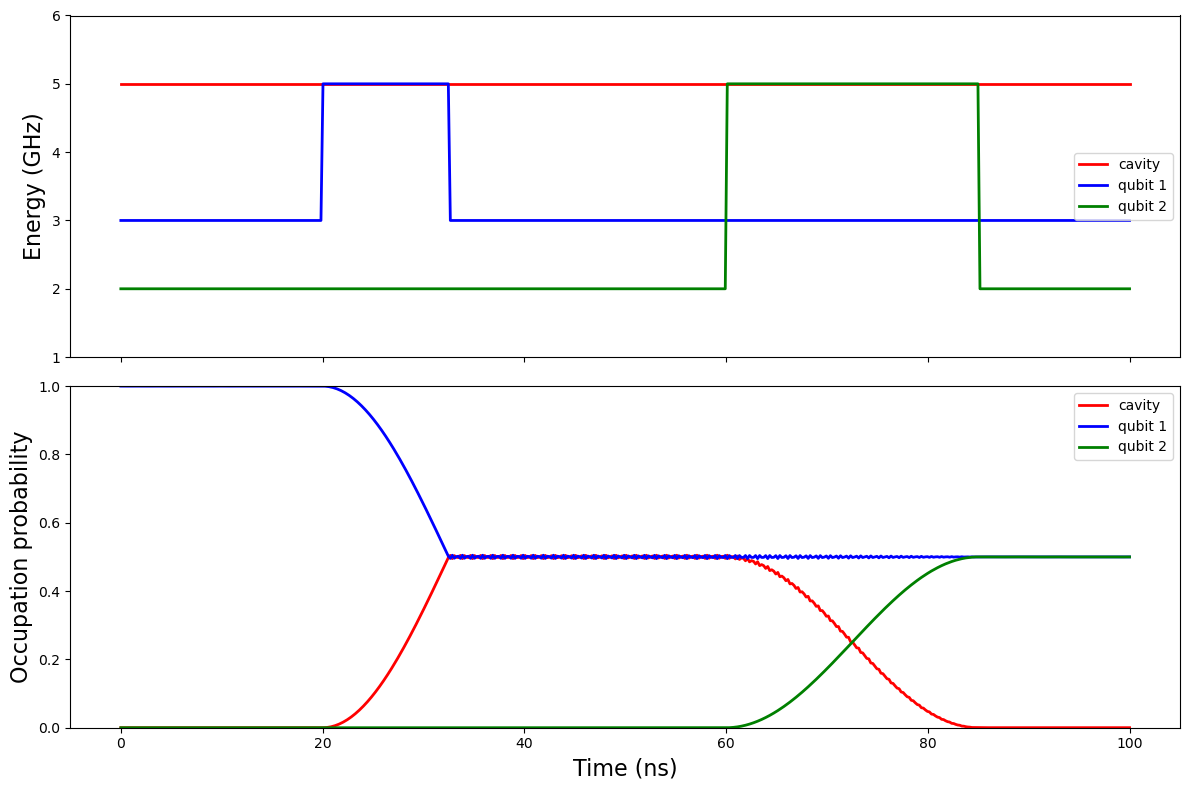

In [16]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, np.array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, np.array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, np.array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, np.real(expect(n, res.states)), 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, np.real(expect(n1, res.states)), 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, np.real(expect(n2, res.states)), 'g', linewidth=2, label="qubit 2")
axes[1].set_ylim(0, 1)
#axes[1].set_xlim(60,100)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

### Inspect the final state

In [17]:
# extract the final state from the result of the simulation
rho_final = res.states[-1]

In [18]:
# trace out the resonator mode and print the two-qubit density matrix
rho_qubits = ptrace(rho_final, [1,2])
rho_qubits

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 2.08762949e-05+0.00000000e+00j  1.15879991e-05-8.74928540e-09j
  -9.46164797e-06+3.43216043e-07j  1.01067055e-06-1.22105629e-07j]
 [ 1.15879991e-05+8.74928540e-09j  4.99983274e-01+0.00000000e+00j
  -4.99958264e-01+5.02495125e-03j  2.38278848e-06-1.84652315e-04j]
 [-9.46164797e-06-3.43216043e-07j -4.99958264e-01-5.02495125e-03j
   4.99984385e-01+0.00000000e+00j -4.07592751e-06+1.84586044e-04j]
 [ 1.01067055e-06+1.22105629e-07j  2.38278848e-06+1.84652315e-04j
  -4.07592751e-06-1.84586044e-04j  1.14647201e-05+0.00000000e+00j]]

In [19]:

# compare to the ideal result of the sqrtiswap gate (plus phase correction) for the current initial state
rho_qubits_ideal = ket2dm(tensor(phasegate(0), phasegate(-pi/2)) * sqrtiswap() * tensor(basis(2,1), basis(2,0)))
rho_qubits_ideal

NameError: name 'phasegate' is not defined

### Fidelity and concurrence

In [ ]:
fidelity(rho_qubits, rho_qubits_ideal)

In [ ]:
concurrence(rho_qubits)

# Dissipative two-qubit iSWAP gate

### Define collapse operators that describe dissipation



In [ ]:
kappa = 0.0001
gamma1 = 0.005
gamma2 = 0.005

c_ops = [np.sqrt(kappa) * a, np.sqrt(gamma1) * sm1, np.sqrt(gamma2) * sm2]

### Evolve the system

In [ ]:
res = mesolve(H_t, psi0, tlist, c_ops, [])

### Plot the results

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, np.array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, np.array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, np.array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, np.real(expect(n, res.states)), 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, np.real(expect(n1, res.states)), 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, np.real(expect(n2, res.states)), 'g', linewidth=2, label="qubit 2")
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

### Fidelity and concurrence

In [ ]:
rho_final = res.states[-1]
rho_qubits = ptrace(rho_final, [1,2])

In [ ]:
fidelity(rho_qubits, rho_qubits_ideal)

In [ ]:
concurrence(rho_qubits)

# Two-qubit iSWAP gate: Finite pulse rise time

In [ ]:
def step_t(w1, w2, t0, width, t):
    """
    Step function that goes from w1 to w2 at time t0
    as a function of t, with finite rise time defined
    by the parameter width.
    """
    return w1 + (w2 - w1) / (1 + exp(-(t-t0)/width))


fig, axes = plt.subplots(1, 1, figsize=(8,2))
axes.plot(tlist, [step_t(0.5, 1.5, 50, width, t) for t in tlist], 'k')
axes.set_ylim(0, 2)
fig.tight_layout()

### Evolve the system

In [ ]:
res = mesolve(H_t, psi0, tlist, [], [])

### Plot the results

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, real(expect(n, res.states)), 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, real(expect(n1, res.states)), 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, real(expect(n2, res.states)), 'g', linewidth=2, label="qubit 2")
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

### Fidelity and concurrence

In [ ]:
rho_final = res.states[-1]
rho_qubits = ptrace(rho_final, [1,2])

In [ ]:
fidelity(rho_qubits, rho_qubits_ideal)

In [ ]:
concurrence(rho_qubits)

# Two-qubit iSWAP gate: Finite rise time with overshoot

In [ ]:
from scipy.special import sici

def step_t(w1, w2, t0, width, t):
    """
    Step function that goes from w1 to w2 at time t0
    as a function of t, with finite rise time and 
    and overshoot defined by the parameter width.
    """

    return w1 + (w2-w1) * (0.5 + sici((t-t0)/width)[0]/(pi))


fig, axes = plt.subplots(1, 1, figsize=(8,2))
axes.plot(tlist, [step_t(0.5, 1.5, 50, width, t) for t in tlist], 'k')
axes.set_ylim(0, 2)
fig.tight_layout()

### Evolve the system

In [ ]:
res = mesolve(H_t, psi0, tlist, [], [])

### Plot the results

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, real(expect(n, res.states)), 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, real(expect(n1, res.states)), 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, real(expect(n2, res.states)), 'g', linewidth=2, label="qubit 2")
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

### Fidelity and concurrence

In [ ]:
rho_final = res.states[-1]
rho_qubits = ptrace(rho_final, [1,2])

In [ ]:
fidelity(rho_qubits, rho_qubits_ideal)

In [ ]:
concurrence(rho_qubits)

# Two-qubit iSWAP gate: Finite pulse rise time and dissipation

In [ ]:
# increase the pulse rise time a bit
width = 0.6

# high-Q resonator but dissipative qubits
kappa  = 0.00001
gamma1 = 0.005
gamma2 = 0.005

c_ops = [sqrt(kappa) * a, sqrt(gamma1) * sm1, sqrt(gamma2) * sm2]

### Evolve the system

In [ ]:
res = mesolve(H_t, psi0, tlist, c_ops, [])

### Plot results

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, real(expect(n, res.states)), 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, real(expect(n1, res.states)), 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, real(expect(n2, res.states)), 'g', linewidth=2, label="qubit 2")
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

### Fidelity and concurrence

In [ ]:
rho_final = res.states[-1]
rho_qubits = ptrace(rho_final, [1,2])

In [ ]:
fidelity(rho_qubits, rho_qubits_ideal)

In [ ]:
concurrence(rho_qubits)

# Two-qubit iSWAP gate: Using tunable resonator and fixed-frequency qubits

In [ ]:
# reduce the rise time
width = 0.25

def wc_t(t, args=None):
    return wc - step_t(0.0, wc-w1, T0_1, width, t) + step_t(0.0, wc-w1, T0_1+T_gate_1, width, t) \
              - step_t(0.0, wc-w2, T0_2, width, t) + step_t(0.0, wc-w2, T0_2+T_gate_2, width, t)

H_t = [[Hc, wc_t], H1 * w1 + H2 * w2 + Hc1+Hc2]

### Evolve the system

In [ ]:
res = mesolve(H_t, psi0, tlist, c_ops, [])

### Plot the results

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))

axes[0].plot(tlist, array(list(map(wc_t, tlist))) / (2*pi), 'r', linewidth=2, label="cavity")
axes[0].plot(tlist, array(list(map(w1_t, tlist))) / (2*pi), 'b', linewidth=2, label="qubit 1")
axes[0].plot(tlist, array(list(map(w2_t, tlist))) / (2*pi), 'g', linewidth=2, label="qubit 2")
axes[0].set_ylim(1, 6)
axes[0].set_ylabel("Energy (GHz)", fontsize=16)
axes[0].legend()

axes[1].plot(tlist, real(expect(n, res.states)), 'r', linewidth=2, label="cavity")
axes[1].plot(tlist, real(expect(n1, res.states)), 'b', linewidth=2, label="qubit 1")
axes[1].plot(tlist, real(expect(n2, res.states)), 'g', linewidth=2, label="qubit 2")
axes[1].set_ylim(0, 1)

axes[1].set_xlabel("Time (ns)", fontsize=16)
axes[1].set_ylabel("Occupation probability", fontsize=16)
axes[1].legend()

fig.tight_layout()

### Fidelity and concurrence

In [ ]:
rho_final = res.states[-1]
rho_qubits = ptrace(rho_final, [1,2])

In [ ]:
fidelity(rho_qubits, rho_qubits_ideal)

In [ ]:
concurrence(rho_qubits)

### Software versions

In [ ]:
from qutip.ipynbtools import version_table

version_table()